In [1]:
%load_ext autoreload
%autoreload 2
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 289 µs (started: 2022-05-03 20:22:02 -06:00)


In [2]:
from NeuralODE import NeuralODE
from NeuralNetwork import NeuralNetwork, read_network_from_sherlock_file
import numpy as np

time: 307 ms (started: 2022-05-03 20:22:11 -06:00)


In [3]:
nn = read_network_from_sherlock_file('networks/controller_network_adhs.nt')

time: 7.23 ms (started: 2022-05-03 20:22:41 -06:00)


In [11]:
def simple_pendulum_ode(x, u, w):
    u_bias = u[0]-20.0
    dx0 = x[1]
    dx1 = np.sin(x[0]) - u_bias * np.cos(x[0]) + w[0] * np.cos(x[0])
    return [dx0, dx1]

time: 1.27 ms (started: 2022-05-03 20:26:33 -06:00)


In [12]:
node = NeuralODE(nn,simple_pendulum_ode,2,1,[(-0.1,0.1)])

time: 731 µs (started: 2022-05-03 20:26:34 -06:00)


In [13]:
tpoints, res = node.simulate(25.0, [0.1, -0.1], 0.01 )

time: 213 ms (started: 2022-05-03 20:26:34 -06:00)


In [14]:
from matplotlib import pyplot as plt

time: 435 µs (started: 2022-05-03 20:26:35 -06:00)


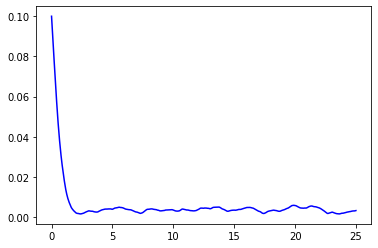

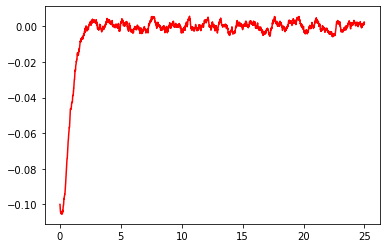

time: 236 ms (started: 2022-05-03 20:27:25 -06:00)


In [18]:
plt.figure(1)
plt.plot(tpoints, [x for [x,_] in res[:-1]],'b-')
plt.figure(2)
plt.plot(tpoints, [x for [_,x] in res[:-1]],'r-')

In [19]:
state_ranges = [(-1, 1), (-1,1)]

time: 529 µs (started: 2022-05-03 20:28:09 -06:00)


In [20]:
traces = node.simulate_for_random_initial_conditions(state_ranges,30.0, 0.02, 100)

time: 13.5 s (started: 2022-05-03 20:28:20 -06:00)


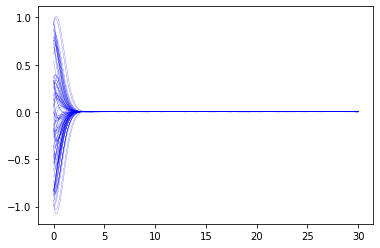

time: 244 ms (started: 2022-05-03 20:28:46 -06:00)


In [21]:
for (tpoints,tr) in traces:
    plt.plot(tpoints, [x for [x,_] in tr[:-1]],'-b',lw=0.2)

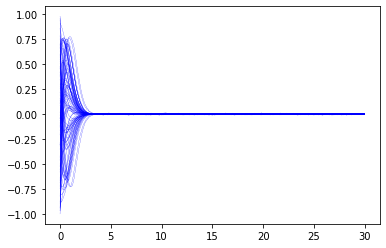

time: 288 ms (started: 2022-05-03 20:28:58 -06:00)


In [22]:
for (tpoints,tr) in traces:
    plt.plot(tpoints, [x for [_,x] in tr[:-1]],'-b',lw=0.2)

In [23]:
stable_ranges= [(-0.05, 0.05), (-0.05, 0.05)]
stab_times= [node.get_stabilization_time(time_points, tr, stable_ranges) for (time_points, tr) in traces]
print(stab_times)

[2.22, 0.92, 2.2800000000000002, 1.16, 1.74, 2.2, 1.96, 1.48, 0.34, 1.94, 1.82, 1.44, 1.72, 1.6400000000000001, 1.78, 1.34, 1.76, 2.7, 1.94, 1.5, 1.8800000000000001, 1.96, 1.62, 1.96, 1.52, 2.04, 2.2, 1.1, 1.6600000000000001, 2.08, 1.08, 1.82, 1.98, 1.56, 2.1, 0.9400000000000001, 1.96, 1.6400000000000001, 2.04, 1.72, 1.6, 2.36, 2.62, 1.76, 1.92, 1.32, 1.0, 2.36, 1.82, 1.72, 2.06, 2.74, 2.2800000000000002, 2.04, 2.3000000000000003, 2.2600000000000002, 1.32, 1.54, 2.08, 1.6600000000000001, 2.04, 2.08, 2.2800000000000002, 2.16, 1.58, 2.58, 1.84, 0.84, 2.0, 1.32, 1.92, 1.92, 2.1, 1.04, 1.46, 1.74, 2.34, 1.9000000000000001, 2.2800000000000002, 2.16, 2.02, 2.14, 1.74, 1.04, 1.84, 1.1, 1.94, 1.92, 1.94, 2.12, 1.92, 1.72, 1.84, 1.56, 1.92, 1.54, 1.54, 2.2, 1.12, 2.12]
time: 159 ms (started: 2022-05-03 20:29:29 -06:00)


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  3.,  5.,  2.,  0.,  4.,  3.,  8.,
         6., 10.,  6., 16.,  8., 10.,  4.,  7.,  2.,  0.,  2.,  2.]),
 array([0.34 , 0.436, 0.532, 0.628, 0.724, 0.82 , 0.916, 1.012, 1.108,
        1.204, 1.3  , 1.396, 1.492, 1.588, 1.684, 1.78 , 1.876, 1.972,
        2.068, 2.164, 2.26 , 2.356, 2.452, 2.548, 2.644, 2.74 ]),
 <BarContainer object of 25 artists>)

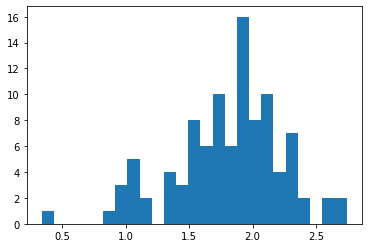

time: 144 ms (started: 2022-05-03 20:29:39 -06:00)


In [24]:
plt.hist(stab_times,bins=25)

In [28]:
timings = []
f = open('simple-pendulum-10k.txt','r')
for line in f:
    timings.append(float(line))
f.close()

time: 6.9 ms (started: 2022-05-03 21:43:32 -06:00)


(array([ 30.,  11.,  22.,  28.,  23.,  50.,  64.,  87., 111.,  83., 114.,
        110., 121., 146., 109., 147., 196., 259., 299., 237., 400., 493.,
        589., 632., 588., 808., 830., 811., 677., 430., 452., 340., 222.,
        164., 101.,  85.,  60.,  32.,  24.,   4.,   7.,   1.,   0.,   2.,
          1.]),
 array([0.   , 0.076, 0.152, 0.228, 0.304, 0.38 , 0.456, 0.532, 0.608,
        0.684, 0.76 , 0.836, 0.912, 0.988, 1.064, 1.14 , 1.216, 1.292,
        1.368, 1.444, 1.52 , 1.596, 1.672, 1.748, 1.824, 1.9  , 1.976,
        2.052, 2.128, 2.204, 2.28 , 2.356, 2.432, 2.508, 2.584, 2.66 ,
        2.736, 2.812, 2.888, 2.964, 3.04 , 3.116, 3.192, 3.268, 3.344,
        3.42 ]),
 <BarContainer object of 45 artists>)

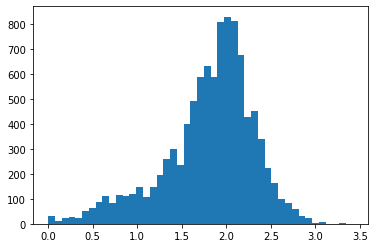

time: 217 ms (started: 2022-05-03 21:44:27 -06:00)


In [34]:
plt.hist(timings, bins=45)